<a href="https://www.kaggle.com/code/aleksandrmorozov123/toolbox-for-robotics?scriptVersionId=219338336" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Implementation of algoritms from roboticstoolbox-python library**

In [2]:
!pip install roboticstoolbox-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.9 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 MB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.8/190.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 4.2 MB/s eta 0:00:00
  Created wheel for roboticstoolbox-python: filename=roboticstoolbox_python-1.1.1-cp310-cp310-linux_x86_64.

<Axes: xlabel='X', ylabel='Y'>

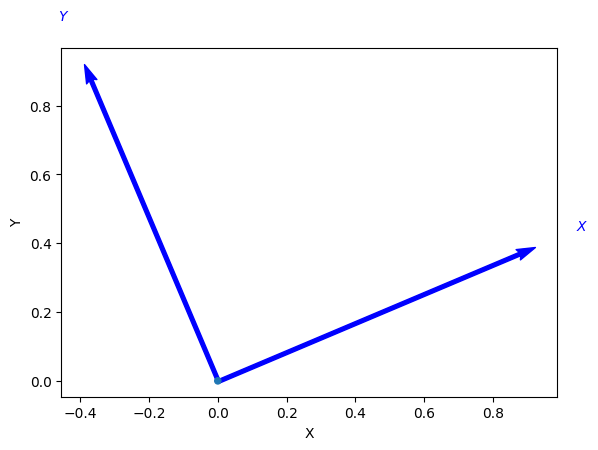

In [3]:
from spatialmath.base import *
from spatialmath import *
import numpy as np
from sympy import Symbol, Matrix, simplify

# create the rotation matrix
R = rot2 (0.4)
trplot2 (R)

In [4]:
# the matrix logarithm
import scipy.linalg

R = rot2 (0.5)
L = scipy.linalg.logm (R)
S = vex (L)

scipy.linalg.expm (L)

array([[ 0.87758256, -0.47942554],
       [ 0.47942554,  0.87758256]])

In [5]:
# skew-symmetric matrix
scipy.linalg.expm (skew (S))

array([[ 0.87758256, -0.47942554],
       [ 0.47942554,  0.87758256]])

In [6]:
# the homogeneous transformation matrix for rotation of 0.5 radian
trot2 (0.5)

array([[ 0.87758256, -0.47942554,  0.        ],
       [ 0.47942554,  0.87758256,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

<Axes: xlabel='X', ylabel='Y'>

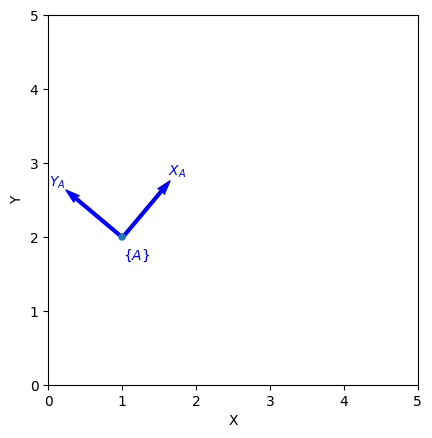

In [7]:
# translation of (1, 2) followed by a rotation of 50
TA = transl2 (1, 2) @ trot2 (50, "deg")
plotvol2 ([0, 5])
trplot2 (TA, frame = "A", color = "b")

<Axes: xlabel='X', ylabel='Y'>

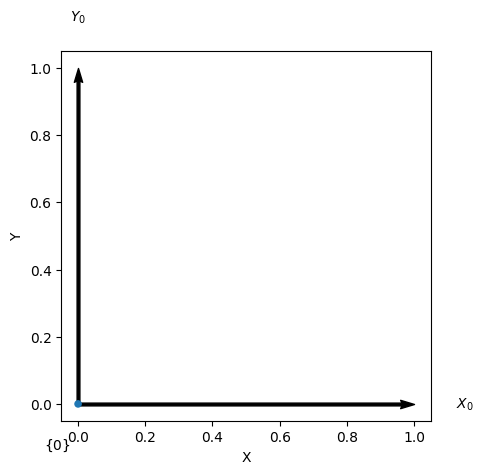

In [8]:
T0 = transl2 (0, 0)
trplot2 (T0, frame = "0", color = "k")

<Axes: xlabel='X', ylabel='Y'>

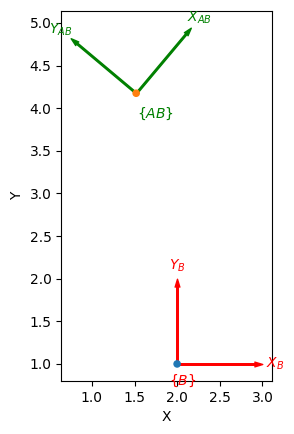

In [9]:
# create relative pose
TB = transl2 (2, 1)
trplot2 (TB, frame = "B", color = "r")
TAB = TA @ TB
trplot2 (TAB, frame = "AB", color = "g")

**Rotation**

<Axes: xlabel='X', ylabel='Y'>

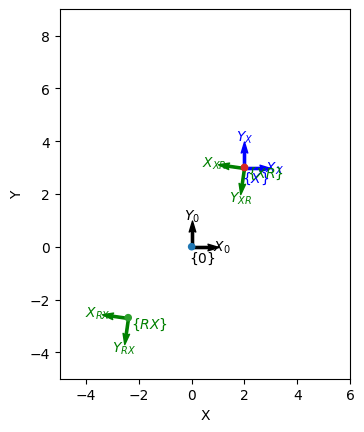

In [10]:
plotvol2 ([-5, 6, -5, 9])
T0 = transl2 (0, 0)
trplot2 (T0, frame = "0", color ="k")
TX = transl2 (2, 3)
trplot2 (TX, frame = "X", color = "b")
TR = trot2 (3)

trplot2 (TR @ TX, frame = "RX", color = "g")
trplot2 (TX @ TR, frame = "XR", color = "g")

<Axes: xlabel='X', ylabel='Y'>

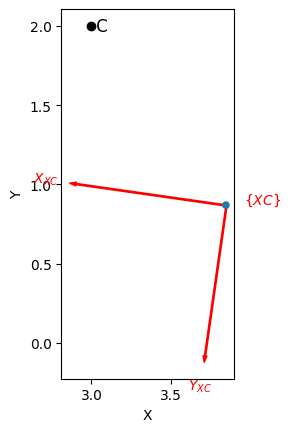

In [11]:
C = np.array ([3, 2])
plot_point (C, "ko", text = "C")
TC = transl2 (C) @ TR @ transl2 (-C)
trplot2 (TC @ TX, frame = "XC", color = "r")

**2-dimensional twists**

In [12]:
S = Twist2.UnitRevolute (C)
scipy.linalg.expm (skewa (3 * S.S))

array([[-0.9899925 , -0.14112001,  6.25221751],
       [ 0.14112001, -0.9899925 ,  3.55662497],
       [ 0.        ,  0.        ,  1.        ]])

In [13]:
S.exp (3)

  -0.99     -0.1411    6.252     
   0.1411   -0.99      3.557     
   0         0         1         


In [14]:
S.pole

array([3., 2.])

In [15]:
S = Twist2.UnitPrismatic ([0, 1])
S.exp (2)

   1         0         0         
   0         1         2         
   0         0         1         


In [16]:
T = transl2 (3, 5) @ trot2 (0.6)
S = Twist2 (T)
S.w

0.6

**3-dimensional rotation**

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

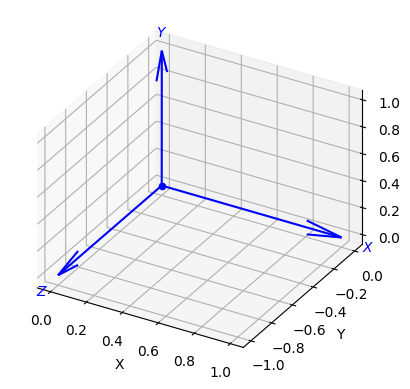

In [17]:
R = rotx (3.14 / 2)
trplot (R)

/opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


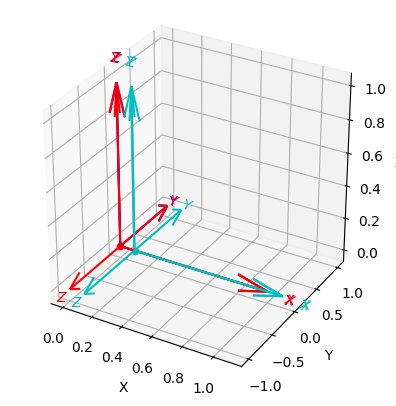

In [18]:
tranimate(R)
trplot (R, anaglyph = True)
tranimate (R, anaglyph = True)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

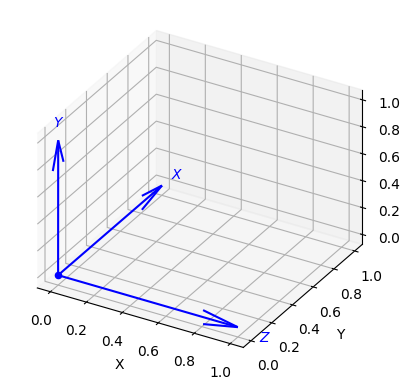

In [19]:
R = rotx (3.14 / 2) @ roty (3.14 / 2)
trplot (R)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

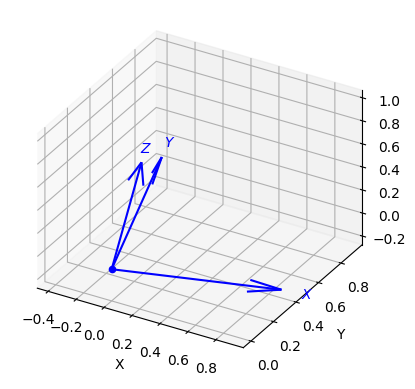

In [20]:
R = rotz(0.2) @ roty(0.3) @ rotz(0.4)
R = eul2r (0.1, 0.2, 0.3)
trplot (R)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

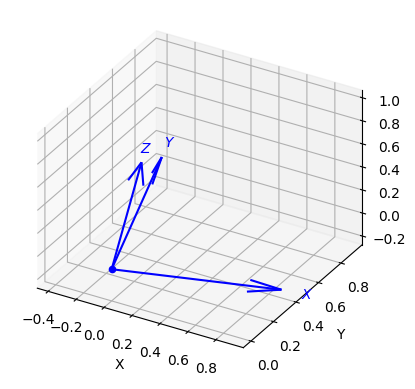

In [21]:
gamma = tr2eul (R)
trplot (R)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

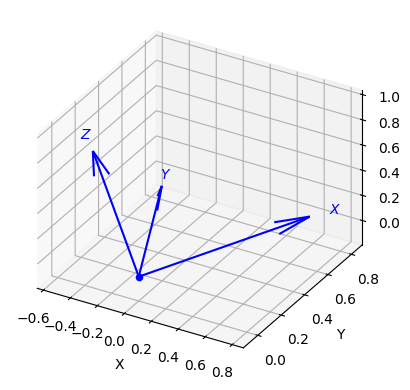

In [22]:
R = eul2r (0.2, - 0.3, 0.4)
trplot (R)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

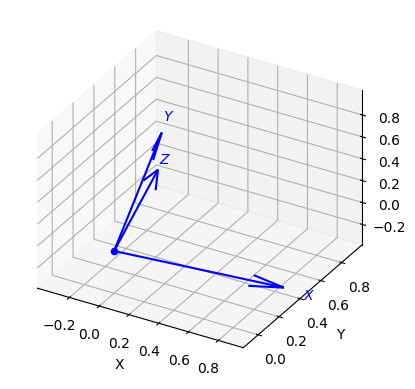

In [23]:
R = rpy2r (0.2, 0.3, 0.4, order = "zyx")
trplot (R)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

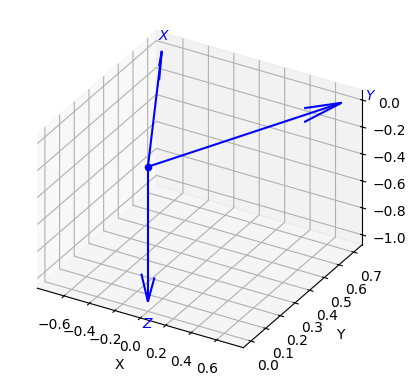

In [24]:
a = [0, 0, -2]
o = [2, 2, 0]
R = oa2r (o, a)
trplot (R)

In [25]:
R = rpy2r (0.2, 0.3, 0.4)
theta, v = tr2angvec (R)
theta

0.5137853254728276

In [26]:
e, x = np.linalg.eig (R)
e

array([0.87089035+0.49147736j, 0.87089035-0.49147736j,
       1.        +0.j        ])

In [27]:
x

array([[-0.68192285+0.j        , -0.68192285-0.j        ,
         0.26450415+0.j        ],
       [ 0.12620529+0.52186033j,  0.12620529-0.52186033j,
         0.65074422+0.j        ],
       [ 0.13803422-0.47713917j,  0.13803422+0.47713917j,
         0.71173698+0.j        ]])

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

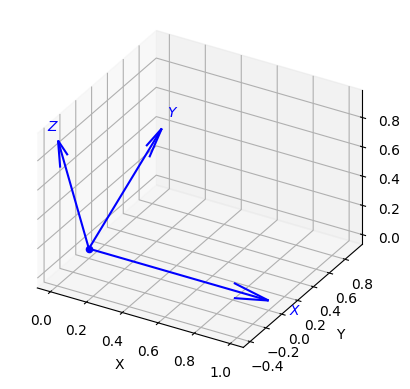

In [28]:
R = angvec2r (0.4, [2, 0, 0])
trplot (R)

In [29]:
q = UnitQuaternion (rpy2r (0.2, 0.3, 0.4))
q.inv ()

 0.9672 << -0.0672, -0.1653, -0.1808 >>


In [30]:
q * q.inv ()
q / q
q.R

array([[ 0.87992318, -0.32757967,  0.3441319 ],
       [ 0.37202555,  0.92556416, -0.07019954],
       [-0.29552021,  0.18979606,  0.93629336]])

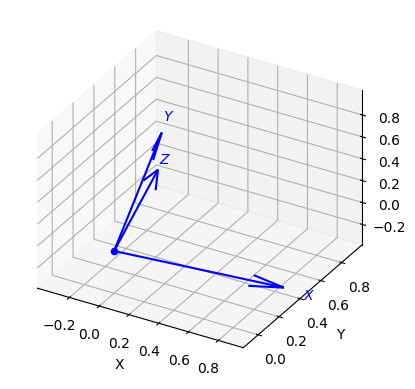

In [31]:
q * [1, 0, 0]
q.plot ()

Axes3D(0.125,0.11;0.775x0.77)


[[<mpl_toolkits.mplot3d.art3d.Line3D at 0x7edf26605360>]]

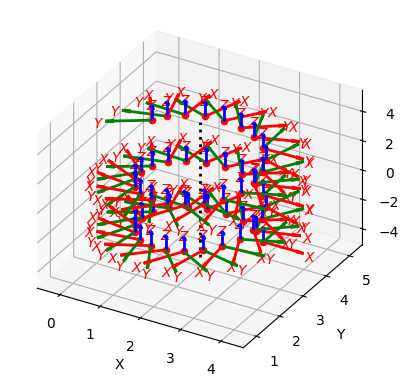

In [32]:
S = Twist3.UnitRevolute ([1, 0, 0], [0, 0, 0])
scipy.linalg.expm (0.3 * skewa (S.S))
S.exp (0.3)
S = Twist3.UnitRevolute ([0, 0, 1], [2, 3, 2], 0.5)
X = transl (3, 4, -4)

for theta in np.arange (0, 15, 0.3):
    trplot (S.exp (theta) .A @ X, style = "rgb", width = 2)

L = S.line ()
L.plot ("k:", linewidth = 2)